<a href="https://colab.research.google.com/github/Yoshani/Pump-It-Up/blob/master/Pump_it_Up_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==0.25

In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling
from sklearn import preprocessing

# plotting
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# Get datasets

In [ ]:
features_df = pd.read_csv(
    "/content/drive/MyDrive/PumpItUp/TrainingSet.csv", 
    index_col="id",
    low_memory=False
)
labels_df = pd.read_csv(
    "/content/drive/MyDrive/PumpItUp/TrainingLabels.csv", 
    index_col="id"
)
test_df = pd.read_csv(
    "/content/drive/MyDrive/PumpItUp/TestSet.csv", 
    index_col="id",
    low_memory=False
)

In [ ]:
features_df.tail()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,Wami / Ruvu,Kikatanyemba,Morogoro,5,2,Morogoro Rural,Ngerengere,150,True,GeoData Consultants Ltd,VWC,NaN,True,2002,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [ ]:
X = features_df.copy()
y = labels_df.copy()
X_test = test_df.copy()

# Exploratory Data Analysis

In [ ]:
# Generate a profile report of the data to examine. 
pandas_profiling.ProfileReport(features_df)

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,40
Number of observations,59400
Total Missing (%),1.9%
Total size in memory,18.1 MiB
Average record size in memory,320.0 B
Numeric,10
Categorical,27
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [ ]:
features_df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

**Analysis of the target**

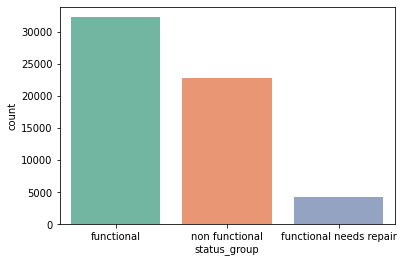

In [ ]:
sns.countplot(x="status_group", data=labels_df, palette="Set2")

The target labels are not evenly distributed. Class imbalance should be dealt with by methods such as using the correct evaluation metric, resampling the training set, etc

**Analysis of missing values**

In [ ]:
missing_df = features_df.copy()

Apart from NaN values, some columns may have 0 inplace of NaN

In [ ]:
columns_with_zeros = missing_df.loc[:, [col for col in missing_df.columns if (missing_df[col] == 0).any()]]
columns_with_zeros.head()

,amount_tsh,gps_height,longitude,num_private,district_code,population,public_meeting,permit,construction_year
id,,,,,,,,,
69572,6000.0,1390,34.938093,0,5,109,True,False,1999
8776,0.0,1399,34.698766,0,2,280,NaN,True,2010
34310,25.0,686,37.460664,0,4,250,True,True,2009
67743,0.0,263,38.486161,0,63,58,True,True,1986
19728,0.0,0,31.130847,0,1,0,True,True,0


GPS height, num private, population, construction year having zeros is same as NaN. Lets replace them with NaN for better analysis

In [ ]:
zero_cols = ['gps_height', 'num_private', 'population', 'construction_year']
for col in zero_cols:
   missing_df.loc[missing_df[col] == 0,col] = np.nan

In [ ]:
columns_with_nan = missing_df.loc[:, [col for col in missing_df.columns if missing_df[col].isnull().any()]]
columns_with_nan.head()

,funder,gps_height,installer,num_private,subvillage,population,public_meeting,scheme_management,scheme_name,permit,construction_year
id,,,,,,,,,,,
69572,Roman,1390.0,Roman,NaN,Mnyusi B,109.0,True,VWC,Roman,False,1999.0
8776,Grumeti,1399.0,GRUMETI,NaN,Nyamara,280.0,NaN,Other,NaN,True,2010.0
34310,Lottery Club,686.0,World vision,NaN,Majengo,250.0,True,VWC,Nyumba ya mungu pipe scheme,True,2009.0
67743,Unicef,263.0,UNICEF,NaN,Mahakamani,58.0,True,VWC,NaN,True,1986.0
19728,Action In A,NaN,Artisan,NaN,Kyanyamisa,NaN,True,NaN,NaN,True,NaN


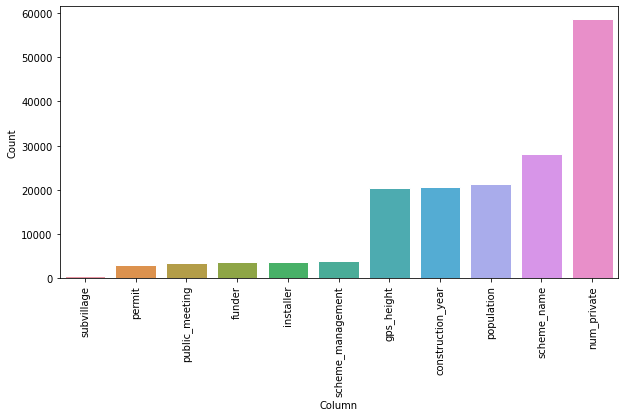

In [ ]:
missing_values = missing_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values.columns = ['Count']
missing_values.index.names = ['Column']
missing_values['Column'] = missing_values.index
plt.subplots(figsize=(10, 5))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Column', y = 'Count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

Num private has almost all missing values. 
Scheme name, population, construction year, and gps height also have a considerable number of missing values

**Analysis of columns with target**

1. Amount of water vs target

In [ ]:
combined_df = features_df.join(labels_df)

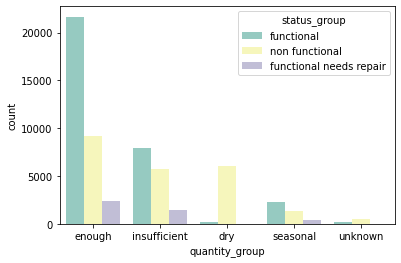

In [ ]:
sns.countplot(x='quantity_group', data=combined_df, hue='status_group', palette="Set3")

There are a lot of wells with sufficient water that are not functioning. These should be repaired first

All of the dry water pumps are deemed not working. Probably only because it is dry, but the pump may actually be working. The dryness should be attended to in this case.

2. Constructed year vs target

Hypothesis: older wells are mostly non functioning

In [ ]:
combined_df.loc[combined_df[col] == 0,col] = np.nan

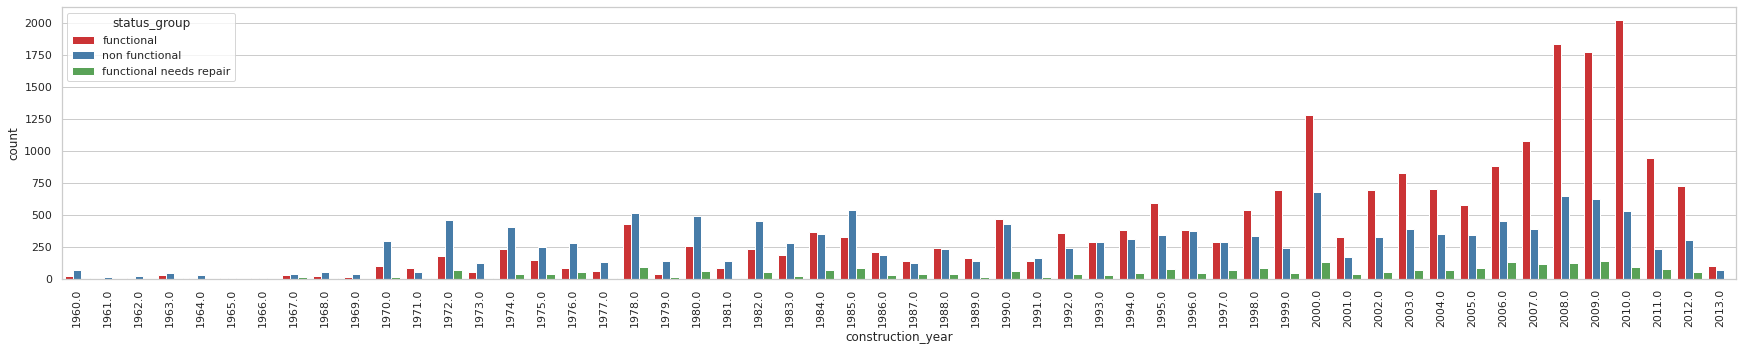

In [ ]:
plt.subplots(figsize=(30, 5))
sns.countplot(x='construction_year',  data=combined_df,
            hue='status_group', color="b", palette="Set1")
plt.xticks(rotation = 90)
plt.show()

Proves the hypothesis. As is obvious, newer pumps are mostly functional while most of the old wells are non functional

3. Water quality vs target

Check whether water quality affects the status of the pump

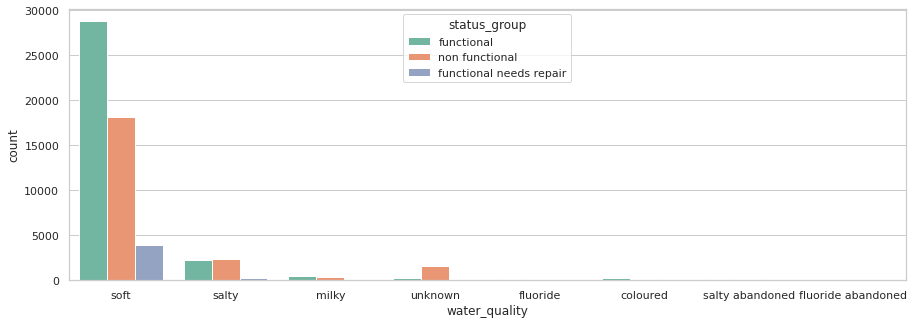

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x='water_quality', data=combined_df, hue='status_group', palette="Set2")

Soft quality water seems to prevail. It is difficult to deduce anything due to this 

Let's analyse the effect of less quality water only on the target

In [ ]:
less_quality_water_df = combined_df.loc[combined_df['water_quality'] != 'soft', :]

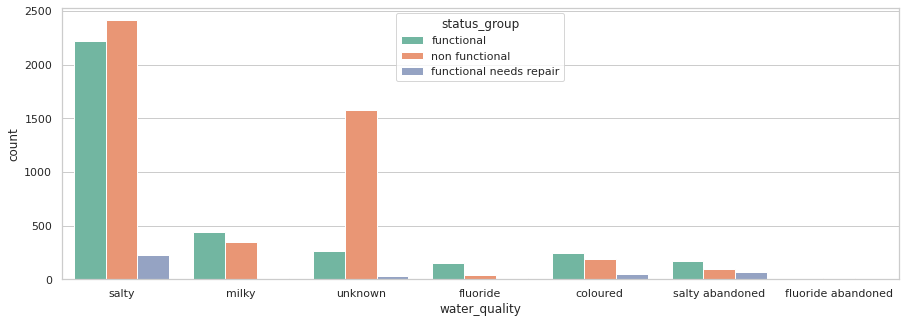

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x='water_quality', data=less_quality_water_df, hue='status_group', palette="Set2")

Mostly salty water and water with the unknown quality have affected the pumps to be nonfunctional

4. Payment vs target

Hypothesis: good payment has a positive impact on the status of the pumps

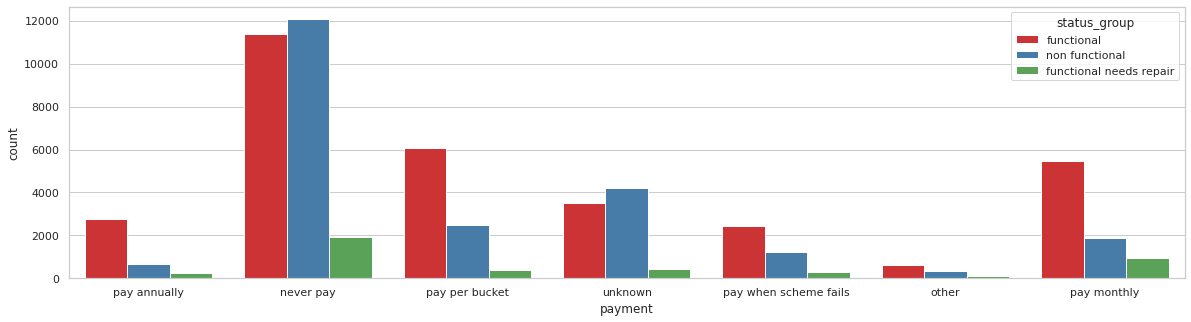

In [ ]:
plt.subplots(figsize=(20, 5))
sns.countplot(x='payment', data=combined_df, hue='status_group', palette="Set1")

It is clear that pumps which get a payment for water are more functional

**Analysis of numeric attributes**

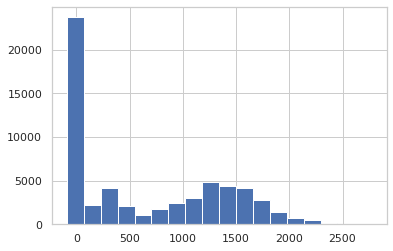

In [ ]:
features_df['gps_height'].hist(bins=18)

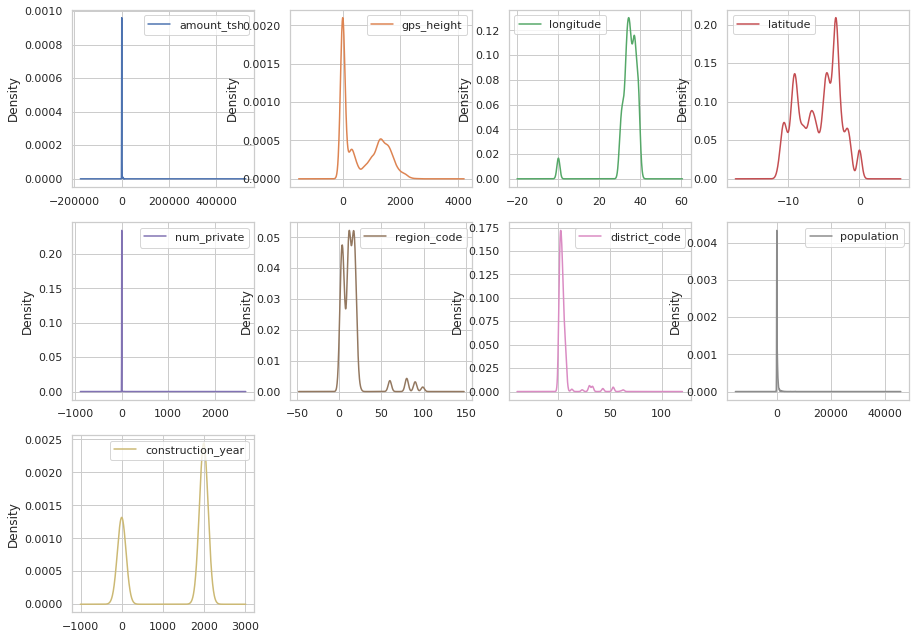

In [ ]:
features_df.plot(kind='density',subplots=True,layout=(4,4),figsize=(15,15),sharex=False)
plt.show()

In many columns there seem to a dominant number of zeros. The zeros in most cases must be unknown values since columns like construction year cannot have a 0

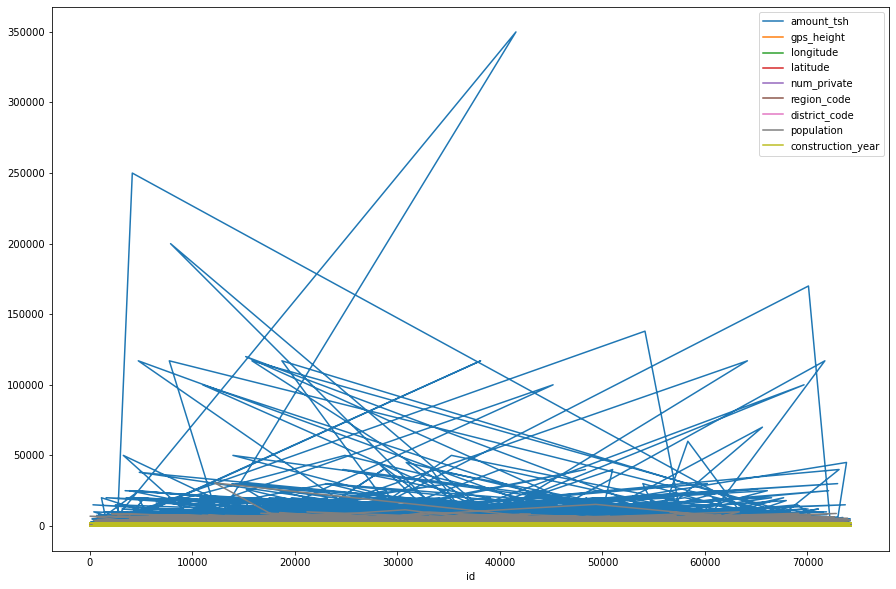

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
features_df.plot(figsize=(15, 10))

In [ ]:
# label encode y for visualizing
label_map = {
    "functional": 0,
    "functional needs repair": 1,
    "non functional": 2
  }

combined_df['status_group'] = combined_df['status_group'].map(label_map)

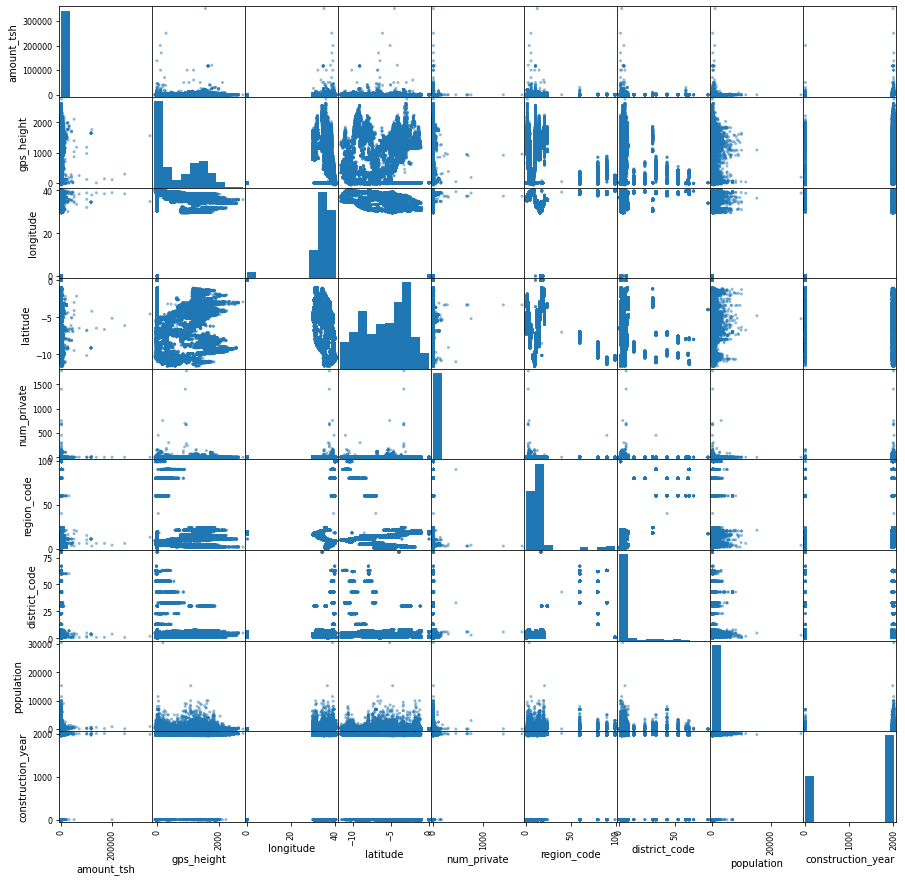

In [ ]:
# pair-wise scatter plot for any two columns
pd.plotting.scatter_matrix(features_df,figsize=(15,15))
plt.show()

In [ ]:
corr_matrix = combined_df.corr()
corr_matrix.sort_values(ascending=False, by="status_group")

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group
status_group,-0.053702,-0.114029,0.004366,-0.014547,-0.005021,0.108640,0.065687,-0.017759,-0.043342,1.000000
region_code,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724,0.108640
district_code,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315,0.065687
longitude,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732,0.004366
num_private,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056,-0.005021
latitude,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278,-0.014547
population,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910,-0.017759
construction_year,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000,-0.043342
amount_tsh,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915,-0.053702
gps_height,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727,-0.114029


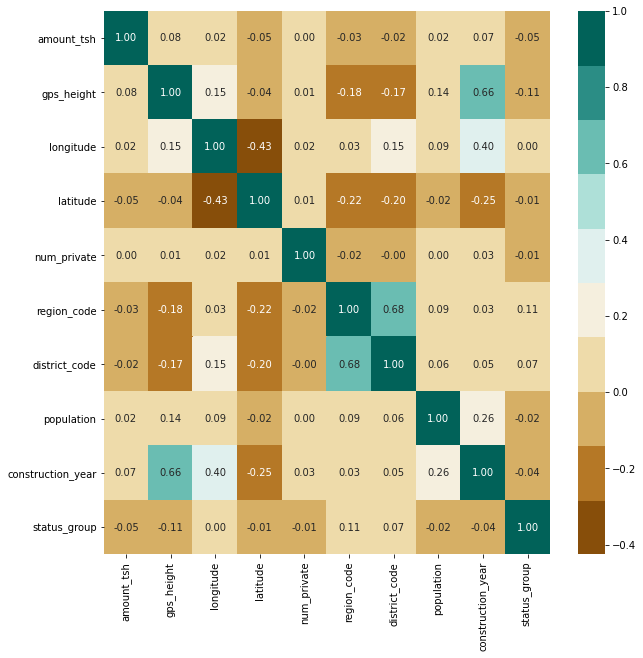

In [ ]:
# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.color_palette("BrBG", 10)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
plt.show()

*   District code and region code have a strong positive correlation
*   Construction year and gps height also have a strong positive correlation
*   Longitude and latitude are very strongly negatively correlated
*   District code and region code are strongly negatively correlated with gps height and latitude







